In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# IMPORTANT: Ensure your dataset is split into train, validation, and test folders
# Example Structure:
# DATA SET/
# ├── train/
# │   ├── Non-Smoker/ (e.g., 80% of your Non-Smoker images)
# │   └── Smoker/     (e.g., 80% of your Smoker images)
# ├── validation/
# │   ├── Non-Smoker/ (e.g., 10% of your Non-Smoker images)
# │   └── Smoker/     (e.g., 10% of your Smoker images)
# └── test/
#     ├── Non-Smoker/ (e.g., 10% of your Non-Smoker images)
#     └── Smoker/     (e.g., 10% of your Smoker images)

# Paths (ADJUST THESE TO YOUR ACTUAL SPLIT DATASET PATHS)
train_path = r"C:\Users\Sravan\Downloads\DATA SET\DATA SET\Train" # Example: point to your train folder
val_path = r"C:\Users\Sravan\Downloads\DATA SET\DATA SET\validation" # Example: point to your validation folder
test_path = r"C:\Users\Sravan\Downloads\DATA SET\DATA SET\Test" # Example: point to your test folder

# 1. Image Preprocessing
img_height, img_width = 128, 128
batch_size = 32

# Only rescale for validation and test, for train you might add more augmentation
train_datagen = ImageDataGenerator(rescale=1./255) # You can add more augmentation here like rotation_range, zoom_range, etc.
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_data = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# --- CRITICAL FOR DEBUGGING YOUR PROBLEM ---
# Print the class indices to understand how labels (0, 1) are assigned to your classes
print("Class Indices:", train_data.class_indices)
# Example output: {'Non-Smoker': 0, 'Smoker': 1} or {'Smoker': 0, 'Non-Smoker': 1}

# 2. CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# 3. Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10 # You might need more epochs depending on your dataset size and complexity
)

# 4. Evaluate Model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# 5. Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# --- Single Image Prediction ---
# Path to your test image - Make sure this image is NOT part of your training data!
# Use an image from your 'test' split.


2025-07-25 10:39:25.517345: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-25 10:39:25.517869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-25 10:39:25.533937: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-25 10:39:25.560103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753420165.585040   17752 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753420165.59

FileNotFoundError: [Errno 2] No such file or directory: 'C:/home/sai-darahas/Downloads/Train'

In [28]:
img_path = r"C:\Users\Sravan\Downloads\DATA SET\DATA SET\Test\Smokers\smoking_65.png "# Example: use an image from your test set

# Load the image
img = image.load_img(img_path, target_size=(img_height, img_width))

# Convert image to array
img_array = image.img_to_array(img)

# Expand dimensions to match model input (batch_size, img_height, img_width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalize (rescale) like training
img_array = img_array / 255.0

# Make prediction
prediction = model.predict(img_array)

# Output result based on your class_indices
# Let's assume train_data.class_indices outputs {'Non-Smoker': 0, 'Smoker': 1}
# If prediction[0][0] is closer to 1, it's a Smoker. If closer to 0, it's a Non-Smoker.

predicted_class_index = round(prediction[0][0]) # Rounds 0.4 to 0, 0.6 to 1

# Get the mapping of index to class name
labels = list(train_data.class_indices.keys())
# labels[0] would be 'Non-Smoker' if class_indices is {'Non-Smoker': 0, 'Smoker': 1}
# labels[1] would be 'Smoker' if class_indices is {'Non-Smoker': 0, 'Smoker': 1}

predicted_label = labels[predicted_class_index]

print(f"\nPrediction raw score: {prediction[0][0]:.4f}")
print(f"Predicted: {predicted_label}")

# Original logic, modified to match the typical output of class_indices
# This assumes 'Non-Smoker' is 0 and 'Smoker' is 1
# Adjust based on your actual `train_data.class_indices` output
# if 'Smoker' is 1 and 'Non-Smoker' is 0:
if train_data.class_indices.get('Smoker') == 1: # Check if Smoker is mapped to 1
    if prediction[0][0] > 0.5:
        print("Predicted (using >0.5 threshold): 🚬 Smoker")
    else:
        print("Predicted (using >0.5 threshold): 🚭 Non-Smoker")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

Prediction raw score: 0.8935
Predicted: Smokers


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


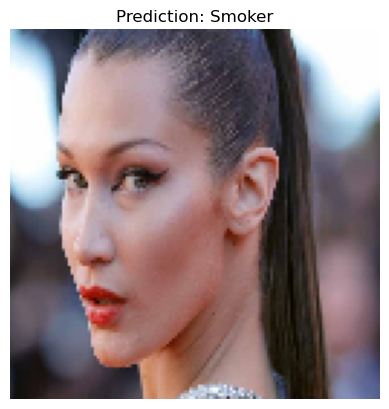

Predicted Label: Smoker | Confidence: 0.89


In [30]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    class_label = 'Smoker' if prediction[0][0] > 0.5 else 'Non-Smoker'

    plt.imshow(img)
    plt.title(f'Prediction: {class_label}')
    plt.axis('off')
    plt.show()

    print(f"Predicted Label: {class_label} | Confidence: {prediction[0][0]:.2f}")

# Example usage:
predict_image(r"C:\Users\Sravan\Downloads\DATA SET\DATA SET\Test\Smokers\smoking_65.png")

In [38]:
def grad_cam_visualization(model, img_path, conv2d_5):
    import cv2

    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Create a model that maps the input image to the activations of the last conv layer + output
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(conv2d_5).output, model.output]
    )

    # Compute the gradient of the prediction with respect to the output feature map
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[0]

    grads = tape.gradient(loss, conv_outputs)[0]  # shape: (h, w, channels)
    weights = tf.reduce_mean(grads, axis=(0, 1))  # global average pooling over width and height

    cam = np.zeros(conv_outputs.shape[1:3], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * conv_outputs[0, :, :, i]

    cam = np.maximum(cam, 0)  # ReLU
    cam = cam / np.max(cam) if np.max(cam) != 0 else cam
    cam = cv2.resize(cam.numpy(), (img_width, img_height))

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255

    # Superimpose heatmap on original image
    superimposed_img = heatmap * 0.4 + img_array[0]
    superimposed_img = np.clip(superimposed_img, 0, 1)

    # Plot
    plt.imshow(superimposed_img)
    plt.title(f"Grad-CAM | Prediction: {'Smoker' if predictions[0] > 0.5 else 'Non-Smoker'}")
    plt.axis('off')
    plt.show()

# Example usage
grad_cam_visualization(model, r"C:\Users\Sravan\Downloads\DATA SET\DATA SET\Test\Smokers\smoking_65.png", conv2d_5='conv2d_2')

ValueError: No such layer: conv2d_2. Existing layers are: ['conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'flatten_1', 'dense_2', 'dense_3'].

In [18]:
pip install cv2


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [20]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [34]:
last_conv_layer_name = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)][-1]
print("Last Conv2D layer:", last_conv_layer_name)

Last Conv2D layer: conv2d_5


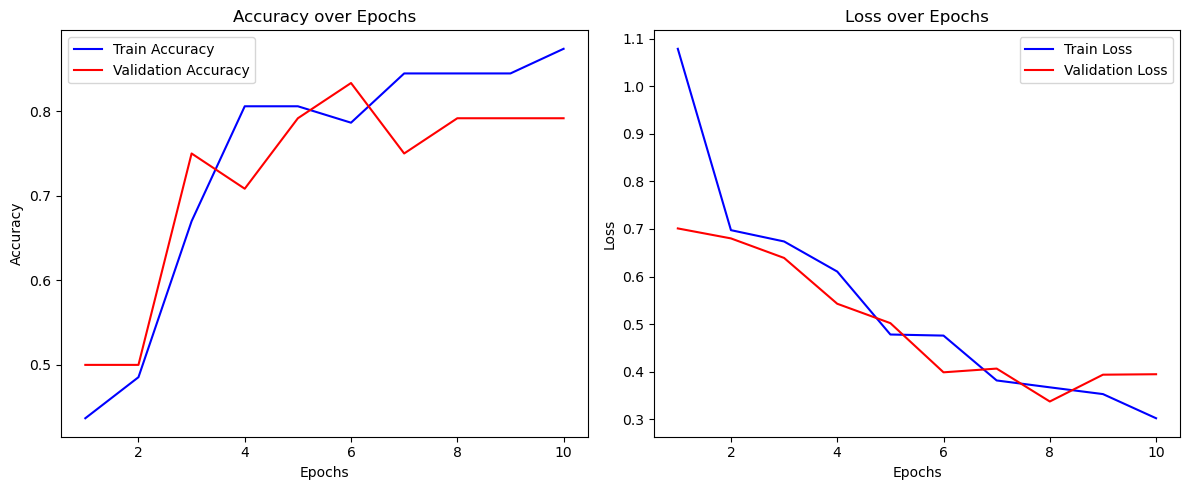

In [42]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call this after training
plot_accuracy_and_loss(history)